In [2]:
import pandas as pd 
import numpy as np
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
# pip install -U scikit-learn

In [4]:
data = pd.read_csv('spam.csv')
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Data Cleaning and Prepocessing

In [5]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

# Define the remove stop words function
def remove_stop_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_tokens)

# Apply the cleaning functions
data['Message'] = data['Message'].apply(clean_text).apply(remove_stop_words)

print(data.head())

  Category                                            Message
0      ham  jurong point crazy available bugis n great wor...
1      ham                            ok lar joking wif u oni
2     spam  free entry 2 wkly comp win fa cup final tkts 2...
3      ham                        u dun say early hor u c say
4      ham                      nah dont think goes usf lives


In [6]:
data['label'] = data['Category'].apply(lambda x: 0.0 if x == 'ham' else 1.0)
data.head()

,Category,Message,label
0,ham,jurong point crazy available bugis n great wor...,0.0
1,ham,ok lar joking wif u oni,0.0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1.0
3,ham,u dun say early hor u c say,0.0
4,ham,nah dont think goes usf lives,0.0


### TF-IDF

In [7]:
#Need to reduce the number of features from 3000 to 100, too many features to run for PCA+GMM
X = data['Message']
y = data['label']

#The model we will need to evaluate in train, test, validation set. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(X)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Display the first few rows of the DataFrame
tfidf_df

,amp,ask,babe,buy,care,cash,claim,come,contact,cos,...,want,wat,way,week,went,win,won,work,yeah,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.616585,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.575093,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.437018,0.0,0.477017,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.473208,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.543524,0.0,0.000000,0.000000,0.0,0.0,0.0


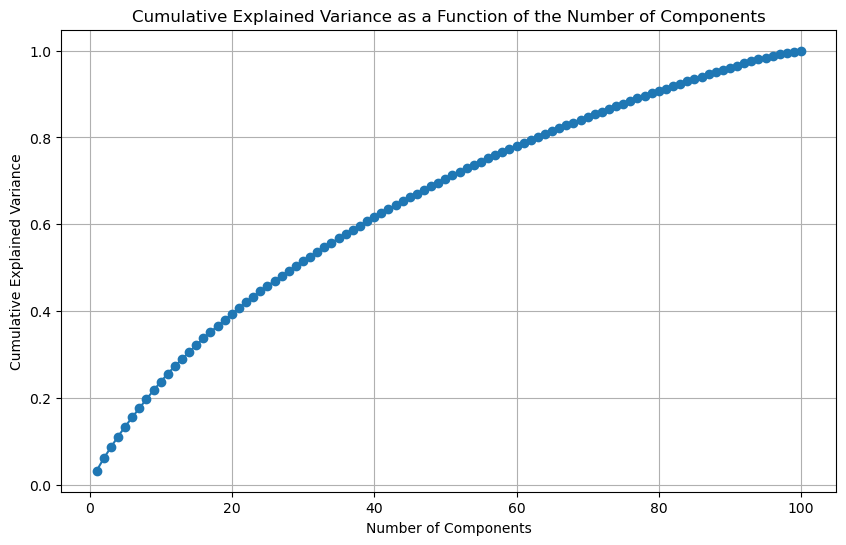

In [9]:
pca = PCA().fit(X_tfidf.toarray())


# Calculate cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

Take up to PC 70 to get to 85% variance explained
Take up to PC 78 to get to 90% variance explained


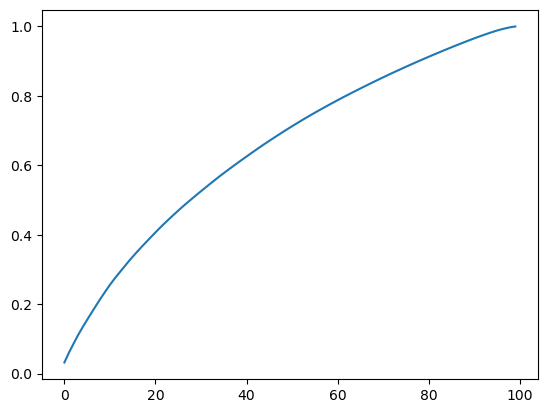

In [10]:
#Find number of PC's that account for 85% and 90% of variance
var_exp_threshs = [85, 90]

total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp)

for var_exp_thresh in var_exp_threshs:
    pcindex = np.where(total_var_exp >= var_exp_thresh / 100)[0]
    print(f'Take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')

data_pc_85 = data.iloc[:, :71]
data_pc_90 = data.iloc[:, :79]

In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame containing 'TF-IDF Features' (already transformed) 
# and 'Label' columns, and 'PCA Components' (with 100 components) stored in the DataFrame
# Example DataFrame creation:
# df = pd.DataFrame({'TF-IDF Features': tfidf_features, 'Label': labels})

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Define parameters for grid search
parameters = {
    'clf__n_estimators': [50, 100, 200], # Random Forest parameters to tune
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(data_pc_85['Message'], data_pc_85['label'], test_size=0.2, random_state=42)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(data_pc_90['Message'], data_pc_90['label'], test_size=0.2, random_state=42)


# Perform grid search
grid_search_85 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search_85.fit(X_train_85, y_train_85)

grid_search_90 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search_90.fit(X_train_90, y_train_90)


# Print the best parameters and best score
print("Best parameters found 70 PC's:")
print(grid_search_85.best_params_)
print("Best score with 70 PC's:")
print(grid_search_85.best_score_)

print("Best parameters found 78 PC's:")
print(grid_search_90.best_params_)
print("Best score with 78 PC's:")
print(grid_search_90.best_score_)


y_pred_85 = grid_search_85.predict(X_test_85)
y_pred_90 = grid_search_90.predict(X_test_90)

# Evaluate the model
accuracy_85 = accuracy_score(y_test_85, y_pred_85)
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Test Accuracy with 70 PC's}:", accuracy_85)
print("\nClassification Report for 70 PC's:")
print(classification_report(y_test_85, y_pred_85))
print("Test Accuracy with 78 PC's}:", accuracy_90)
print("\nClassification Report for 78 PC's:")
print(classification_report(y_test_90, y_pred_90))


KeyboardInterrupt: 

In [12]:
pca = PCA(n_components=70)  # Adjust n_components based on desired variance to keep
X_pca = pca.fit_transform(X_tfidf.toarray())

# Apply GMM
gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='full')  # Adjust n_components based on expected clusters
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)

# Add cluster labels to your dataframe
data['cluster_label'] = cluster_labels
data.head()

,Category,Message,label,cluster_label
0,ham,jurong point crazy available bugis n great wor...,0.0,1
1,ham,ok lar joking wif u oni,0.0,1
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1.0,1
3,ham,u dun say early hor u c say,0.0,0
4,ham,nah dont think goes usf lives,0.0,0


Text(0.5, 1.0, 'GMM')

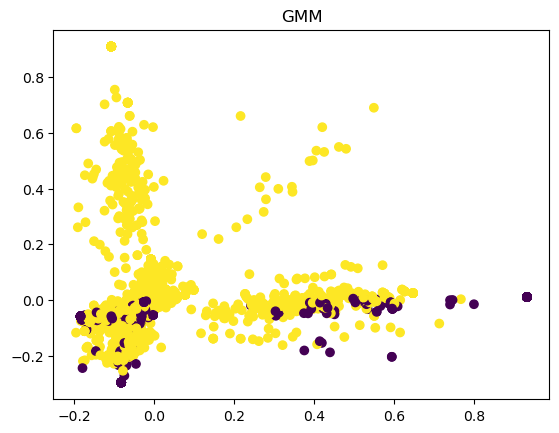

In [13]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("GMM")

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Assuming labels_true and labels_pred are the true labels and predicted labels, respectively
ari_score = adjusted_rand_score(data['label'], cluster_labels)

print("Adjusted Rand Index Score:", ari_score)

silhouette = silhouette_score(X_pca,cluster_labels) 
silhouette

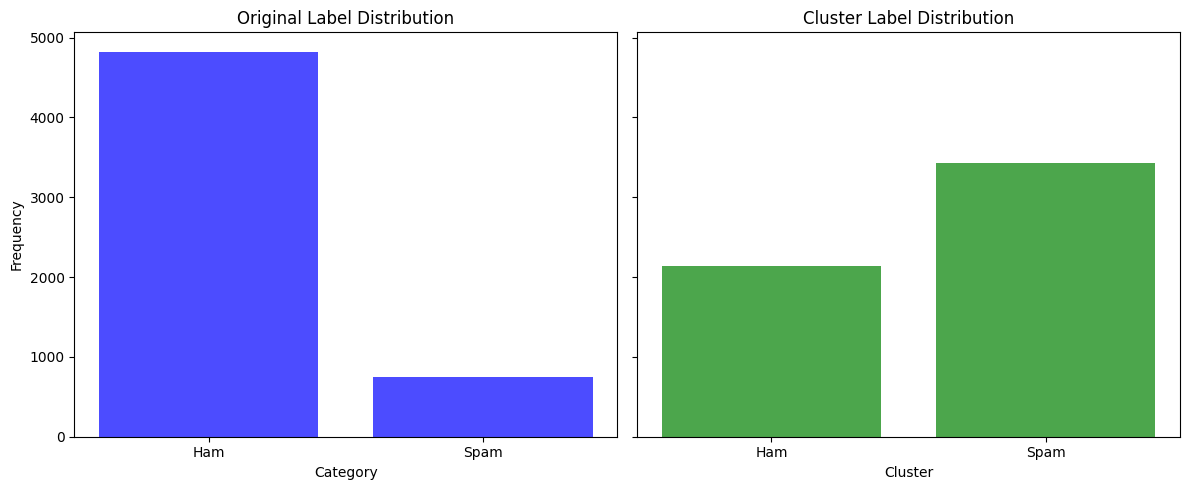

In [30]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Original Label Distribution
axes[0].hist(data['label'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='blue', alpha=0.7)
axes[0].set_title('Original Label Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Ham', 'Spam'])
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Category')

# Cluster Label Distribution
axes[1].hist(data['cluster_label'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='green', alpha=0.7)
axes[1].set_title('Cluster Label Distribution')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Ham', 'Spam'])
axes[1].set_xlabel('Cluster')

plt.tight_layout()
plt.show()